**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import scipy as sp 
import numpy as np
from scipy import optimize
from types import SimpleNamespace
import matplotlib.pyplot as plt 
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})




## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [2]:
# write your code here

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

In [3]:
# write your code here


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


In [4]:
# write your code here

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [5]:
# write your code here

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [6]:
# write your code here

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [7]:
# write your code here  

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [ ]:
# define parameter namespace
par = SimpleNamespace()
par.eta = 0.5
par.w = 1.0

kappa = [1.0, 2.0]

# profit function as defined in assignment text
def profits(par, ell, kappa):
    return kappa*ell**(1-par.eta)-par.w*ell

# optimal ell based on analytical solution
def ell_opt_anal(par, kappa):
    """
    Calculates the optimal value of ell based on the analytical solution.

    Parameters:
    - par: Parameter namspace containing model parameters.
    - kappa: Array of kappa values.

    Returns:
    - ell_opt: Array of optimal ell values corresponding to each kappa value.
    """
    ell_opt = [None]*len(kappa)
    for i, k in enumerate(kappa):
        ell_opt[i] = ((1-par.eta)*k/par.w)**(1/par.eta)
    return ell_opt

# rule els based on rule for question 2.2 sames as analytical, but non list based inputs
def ell_opt_rulebased(par, kappa):
    """
    Calculates the optimal value of ell based on a rule-based formula.
    Parameters:
    - par: Parameter namespace containing model parameters.
    - kappa: kappa value.

    Returns:
    - ell_opt: optimal ell value corresponding to kappa value.
    """
    return ((1-par.eta)*kappa/par.w)**(1/par.eta)

# optimal ell 
def sol_ell(par, kappa):
    """ 
    Calculates optimal ell numerically for a list of given kappas
    Parameters:
    - par: simple namesspacem with model parameters 
    - kappa: array of kappas

    Returns
    - res: Array of results from optimization
    """
    res = [None] * len(kappa)
    #loop through kappas
    for i, k in enumerate(kappa):
        #define objective function 
        obj = lambda ell: -profits(par, ell, k)
        # call optimizer from scipy
        x0 = [0.1]
        res[i] = optimize.minimize(obj, x0, method='nelder-mead', bounds=((0, np.inf), ))
    return res

res = sol_ell(par, kappa)
opt_anal = ell_opt_anal(par, kappa)


In [ ]:
print(res[0].x, res[1].x,opt_anal)

[0.25] [1.] [0.25, 1.0]


Optimizing numerically we find the same solution as the analytical solution. We can check this further by using the numpy "isclose" function, using this we again find that the numerical and analytical solution is the same:

In [ ]:
print(np.isclose(res[0].x,opt_anal[0]),
np.isclose(res[1].x, opt_anal[1]))

[ True] [ True]


We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [ ]:
# deffine new parameters
par.rho = 0.90
par.iota = 0.01
par.sigma = 0.1
par.R = (1+0.01)**(1/12)
par.K = 500
par.kappa_init = 1
par.T = 120
par.Delta = 0


def kappa_series(par):
    """
    Calculates AR(1) series for given parameters
    Parameters:
    - par: simple namespace with model paramets
    Returns: 
    - kappa_ar1: AR(1) timeseries of kappa
    """

    eps = np.random.normal(loc=-0.5*par.sigma**2,scale=par.sigma, size=par.T) #create T shocks
    log_kappa_ar1 = np.zeros(par.T) #intitiate list for log kappas
    kappa_ar1 = np.zeros(par.T) # initiate list kappas 
    log_kappa_ar1[0] = par.rho*np.log(par.kappa_init)+eps[0] #log kappa0
    kappa_ar1[0] = np.exp(log_kappa_ar1[0]) #kappa 0
    for i in range(par.T):
        if i > 0: #calculate log kappa and kappa for period t
            log_kappa_ar1[i] = par.rho*np.log(kappa_ar1[i-1]) + eps[i]
            kappa_ar1[i] = np.exp(log_kappa_ar1[i])
        else: #let kappa0 be kappa0 
            kappa_ar1[i] = kappa_ar1[i]
            log_kappa_ar1[i] = log_kappa_ar1[i]
    return kappa_ar1

In [ ]:
def h_func(par, shocks):
    """
    Calculates discounted profits for par.T periods, for given shocks
    Args:
    - par: SimpleNamespace with model parameters
    - shocks: AR(1) process of shocks

    Returns:
    - np.sum(profit_series): sum of discounted shocks.
    """

    profit_series = np.zeros(par.T)    
    ell_series = ell_opt_rulebased(par, shocks)

    for i in range(par.T):
        if i > 0 and np.abs(ell_series[i]-ell_series[i-1]) > par.Delta:
            profit_series[i] = (par.R**-i)*(profits(par, ell_series[i], shocks[i]) -par.iota)
        elif i > 0 and np.abs(ell_series[i]-ell_series[i-1]) <= par.Delta:
            ell_series[i] = ell_series[i-1] # in this case set ell_t to ell_t-1
            profit_series[i] = (par.R**-i)*profits(par, ell_series[i], shocks[i])
    return np.sum(profit_series)


def big_H(par):
    """
    Simulates profits par.K times
    Args:
    - par: SimpleNamespace with model parameters

    Returns:
    - np.mean(h_list): mean of simulated profits
    """
    h_list = np.zeros(par.K)
    for i in range(par.K):
        shocks = kappa_series(par)
        h_list[i] = h_func(par, shocks)
    return np.mean(h_list)

With above functions we can calculate the expected value of future profits. we plot the results for different Ks to check if K affects the result much. We choose to go with k=1000 for the rest of the assignment.

Text(0, 0.5, 'Expected profits')

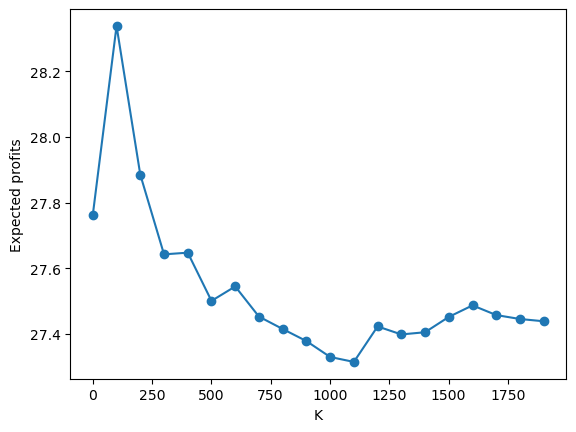

In [ ]:
par.Delta = 0
Ks = np.arange(1, 2000, step=100)

prof_Delta_0 = np.zeros(len(Ks))

for i,K in enumerate(Ks):
    par.K = K
    np.random.seed(1234)
    prof_Delta_0[i] = big_H(par)

fig, ax = plt.subplots(1,1)
ax.plot(Ks, prof_Delta_0, marker='o')
ax.set_xlabel('K')
ax.set_ylabel('Expected profits')

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [ ]:
# write your code here
par.Delta= 0.05
par.K = 1000
np.random.seed(1234)
profits_high_Delta = big_H(par)
print(f"Profits for high delta {profits_high_Delta:.3f},\n Profits delta =0 {prof_Delta_0[10]:.3f}")

Profits for high delta 28.004,
 Profits delta =0 27.330


We see that profitability is improved for a higher $\Delta$

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [ ]:
# write your code here
par.K = 1000
def obj(Delta, par):
    """
    Objective function used for optimizing choice Delta
    Returns:
    - negative of expected profits function
    """
    np.random.seed(1234)
    par.Delta = Delta
    return -1*big_H(par)
def sol_Delta(par):
    """
    Calculates optimal Delta
    Parameters:
    - par: SimpleNamespace with model parameters 
    """
    x0 = [0.01]
    res = optimize.minimize(obj, args=(par), x0=x0, method='nelder-mead')
    return res

In [ ]:
optimalDelta = sol_Delta(par)

In [ ]:
print(f"The optimal solution is {optimalDelta.x[0]:.3f}")

The optimal solution is 0.075


We can illustrate this in a plot with delta on the x axis an profits on the y-axis. The code takes a little long to run.

In [ ]:
from tqdm import tqdm 
par.K = 1000
H = np.empty(100)
Delta = np.linspace(0,0.5,100)
for i, d in tqdm(enumerate(Delta)):
    par.Delta = d
    np.random.seed(1234)
    H[i] = big_H(par)

100it [01:38,  1.01it/s]


Text(0, 0.5, 'Expected profits')

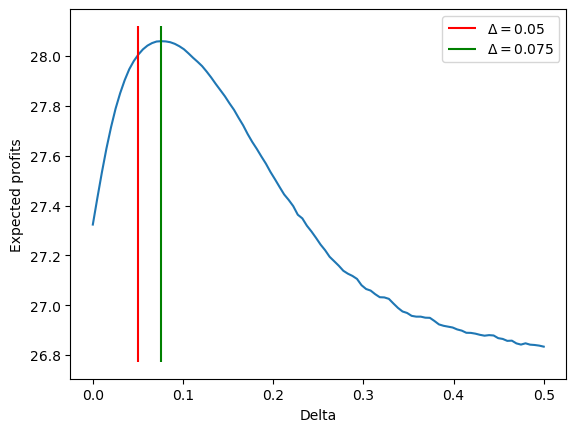

In [ ]:
fig, ax = plt.subplots(1,1)
ax.plot(Delta, H)
ymin = ax.get_ylim()[0]
ymax = ax.get_ylim()[1]
# Add a vertical line at x=3 aligned with the top and bottom of the figure
ax.vlines(x=0.05, ymin=ymin, ymax=ymax, color='r', label="$\Delta = 0.05$")
ax.vlines(x=optimalDelta.x[0], ymin=ymin, ymax=ymax, color='g', label="$\Delta = 0.075$")
ax.legend()
ax.set_xlabel('Delta')
ax.set_ylabel('Expected profits')


Here it we can see that there is an obvious peak around $\Delta=0.075$


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



Instead of constantly changing the work force, we, as hair salon owners, consider only changing it after every $\gamma$-periods.
We can write the policy as

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if } t \bmod \gamma = 0, \\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\
 \gamma \in {1,2,\dots} 

$$
Choosing $ \gamma = 1 $ will therefore give us the same results, as in **Question 2**.

We write up our alternative functions, following previous notation:

In [ ]:
def h_func_alt(par, shocks):
    """
    Calculates discounted profits for par.T periods, for given shocks
    Args:
    - par: SimpleNamespace with model parameters
    - shocks: AR(1) process of shocks

    Returns:
    - np.sum(profit_series): sum of discounted shocks.
    """

    profit_series = np.zeros(par.T)    
    ell_series = ell_opt_rulebased(par, shocks)

    k = 0
    for i in range(par.T):
        k+=1
        if k == par.gamma or i == 0: 
            profit_series[i] = (par.R**-i)*(profits(par, ell_series[i], shocks[i])-par.iota)
            k=0
        else:
            profit_series[i] = (par.R**-i)*(profits(par, ell_series[i-k], shocks[i])) 

    return np.sum(profit_series)


def big_H_alt(par):
    """
    Simulates profits par.K times
    Args:
    - par: SimpleNamespace with model parameters

    Returns:
    - np.mean(h_list): mean of simulated profits
    """
    h_list = np.zeros(par.K)
    for i in range(par.K):
        shocks = kappa_series(par)
        h_list[i] = h_func_alt(par, shocks)
    return np.mean(h_list)

As before, we maximize the profit of the company, now with regards to gamma. We do this for different values of iota aswell, to illustrate the dynamics between the two parameters.

In [ ]:
# a. choose settings
# i. trade off: speed / accuracy
par.K = 400

# ii. specify values for loop 
N_gamma = 10 # number of fixed periods
N_iota = 4  # number of adjustment costs
max_iota = 0.03

fixed_periods = range(1, N_gamma+1)
iota_values = np.linspace(0,max_iota,N_iota)

# b. loop over different values of gamma and iota and store in H_matrix
H_matrix = np.empty((N_iota, N_gamma))
for j,iota in tqdm(enumerate(iota_values)):
    par.iota = iota 
    for i, fixed_period in enumerate(fixed_periods):
        par.gamma = fixed_period 
        np.random.seed(1234)
        H_matrix[j,i] = big_H_alt(par)

4it [00:09,  2.28s/it]


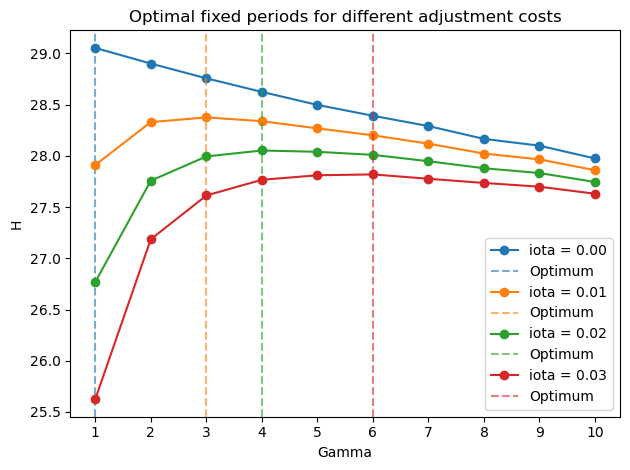

In [ ]:
# c. plot results 
# i. main 
fig, ax = plt.subplots(1,1)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
for j in range(N_iota):
    ax.plot(fixed_periods, H_matrix[j,], 
            color=colors[j], 
            label=f'iota = {iota_values[j]:0.2f}',
            marker='o')
    ax.axvline(x=np.argmax(H_matrix[j,])+1, 
               color=colors[j], 
               label='Optimum',
               linestyle='--', 
               alpha=0.6)

# ii. title, labels and ticks 
ax.set_title('Optimal fixed periods for different adjustment costs') 
ax.set_xlabel('Gamma')
ax.set_ylabel('H')
ax.set_xticks(fixed_periods)

# iii. legend
ax.legend(fontsize = 10)

fig.tight_layout();

From the figure, we see profit distributed on intervals of fixed contract periods, gamma, for different adjustment costs, iota. <br>
Intuitively, we see that if there are no adjustment costs, then the optimal value for gamma is 1, i.e. change labor supply every day to the optimal. By increasing the interval of fixed labor supply the total revenue declines, as there are more periods, where they can't behave optimaly, other things being equal. <br>
However, when the adjustment costs increases, we see that the optimal choice of interval for fixed labour supply, also increases. By raising the adjustment cost from 0 to 0.01, the optimal fixed periods go from 1 to 3. Which gives an increas of revenue!  <br>
We therefore conclude that in the presence of adjustment costs, it would be profitable not to adjust labor supply every period.


## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [ ]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [ ]:
# 1. generate our global optimizer with refined multi-start.

def glob_opt_multi_start(f, lower_bound, upper_bound, tol, K_warm_up, K_max):
    """
    Perform global optimization using the multi-start approach.

    Parameters:
    - f (callable): objective function to be minimized.
    - lower_bound (float): lower bound(s) for the optimization variables.
    - upper_bound (float): upper bound(s) for the optimization variables.
    - tol (float): Tolerance for convergence in algorithm and optimizer. 
    - K_warm_up (int): number of initial iterations without refinement.
    - K_max (int): maximum number of iterations.

    Returns:
    - x_star (ndarray): optimal solution found.
    - x_k0s (list): list of initial guesses used in each iteration.
    """

    
    x_k0s = [] # store initial guesses  

    for k in range(K_max):

        # 3A: draw random x_k uniformly within chosen bounds
        x_k = np.random.uniform(lower_bound, upper_bound, size=(2))

        if k < K_warm_up: # then go to 3E
            # 3B: no refinement
            x_k0 = x_k # KJT ADDED THIS !

        else:
            # 3C: calculate chi_k
            chi_k = 0.5 * 2 / (1 + np.exp((k - K_warm_up) / 100))
            
            # 3D: Refine x_k0 using chi_k and x_star
            x_k0 = chi_k * x_k + (1 - chi_k) * x_star

        # 3E: run optimizer & store initial guess
        x_kstar = optimize.minimize(f, x0=x_k0, method='BFGS', tol=tol) 
        x_k0s.append(x_k0)

        # 3F: update x_star if better
        if k == 0 or f(x_kstar.x) < f(x_star):
            x_star = x_kstar.x
       
        # 3G: check termination condition
        if f(x_star) < tol:
            print('break')
            break

    return x_star, x_k0s


In [ ]:
# 2. specify settings 
lower_bound = -600
upper_bound = 600
tol = 1e-8
K_warm_up = 10
K_max = 1000

# 3. run optimizer on griewank & check results 
np.random.seed(1234) # for reproducibility 
x_star,x_k0s  = glob_opt_multi_start(griewank, lower_bound, upper_bound, tol, K_warm_up, K_max)

print(f'x_star = {x_star}')
print(f'x_star == [0,0] = {np.isclose(x_star,[0,0])}')
print(f'k={len(x_k0s)}-simulations')

break
x_star = [-6.93082502e-09  5.99902737e-09]
x_star == [0,0] = [ True  True]
k=230-simulations


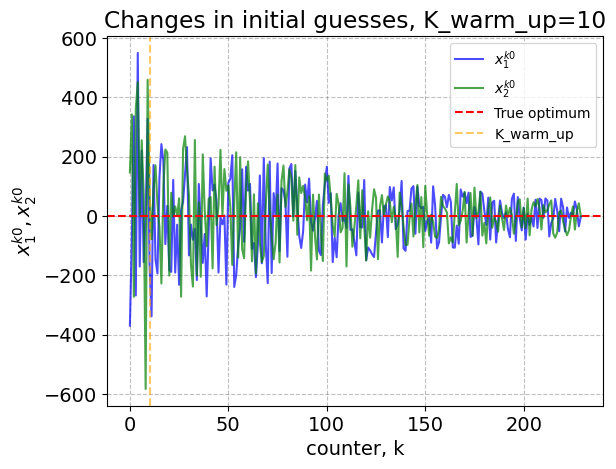

In [ ]:
# 4. unpack initial guesses
x_k0_1s = [i[0] for i in x_k0s ]
x_k0_2s = [i[1] for i in x_k0s ]
k = np.arange(len(x_k0_1s))

# 5. plot results 
# a. main 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# b. plot values 
# i. for x_k0-values 
ax.plot(k, x_k0_1s, 'b-', alpha=0.7, label='$x^{k0}_1$')
ax.plot(k, x_k0_2s, 'g-', alpha=0.7, label='$x^{k0}_2$')

# ii. lines on axis
plt.axhline(y=0, color='r', linestyle='--', label='True optimum')
plt.axvline(x=K_warm_up, color='orange', alpha=0.6, linestyle='--', label='K_warm_up')

# c. title and labels  
ax.set_title(f"Changes in initial guesses, K_warm_up={K_warm_up}" )
ax.set_xlabel('counter, k')
ax.set_ylabel('$x^{k0}_1, x^{k0}_2$')

# d. legend
ax.legend(loc='upper right', fontsize=10);

As we can see from the figure, there seems to be a higher variation in the initial guesses, when we are in 'the warm-up'-period, $[0, \underline{K} ]$. <br>
Afterwards the initial guesses slowly converges toward the true optimum, which suggests that the revized initial guess from 3D, increases the speed of convergence. <br>


**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [ ]:
# we rerun previous code, with the new change in K_warm_up!

# 2. specify settings 
lower_bound = -600
upper_bound = 600
tol = 1e-8
K_warm_up = 100 # changed!
K_max = 1000

# 3. run optimizer on griewank & check results 
np.random.seed(1234) # for reproducibility 
x_star,x_k0s  = glob_opt_multi_start(griewank, lower_bound, upper_bound, tol, K_warm_up, K_max)

print(f'x_star = {x_star}')
print(f'x_star == [0,0] = {np.isclose(x_star,[0,0])}')
print(f'k={len(x_k0s)}-simulations')

break
x_star = [-7.91600055e-09  9.46688217e-10]
x_star == [0,0] = [ True  True]
k=334-simulations


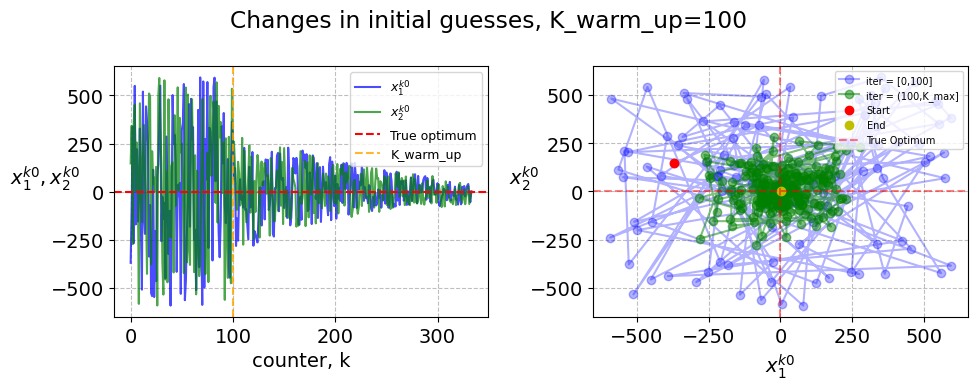

In [ ]:
# 4. unpack initial guesses
x_k0_1s = [i[0] for i in x_k0s ]
x_k0_2s = [i[1] for i in x_k0s ]
k = np.arange(len(x_k0_1s))

# 5. plot results 
fig = plt.figure(figsize = (10,4))
fig.suptitle(f'Changes in initial guesses, K_warm_up={K_warm_up}')

# a. left plot 
ax = fig.add_subplot(1,2,1)

# i. plot variables 
ax.plot(k, x_k0_1s, 'b-', alpha=0.7, label='$x^{k0}_1$')
ax.plot(k, x_k0_2s, 'g-', alpha=0.7, label='$x^{k0}_2$')

# ii. lines on axis
ax.axhline(y=0, color='r', linestyle='--', label='True optimum')
ax.axvline(x=K_warm_up, color='orange', alpha=0.8, linestyle='--', label='K_warm_up')

# iii. title and labels  
ax.set_xlabel('counter, k')
ax.set_ylabel('$x^{k0}_1, x^{k0}_2$', rotation = 'horizontal')

# iv. legend
ax.legend(loc='upper right', fontsize=9)


# b. right plot 
ax = fig.add_subplot(1,2,2)

# i. variables 
ax.plot(x_k0_1s[:100], x_k0_2s[:100], 'b-', alpha=0.3, label='iter = [0,100]',marker ='o')  # first 100 observations with blue color
ax.plot(x_k0_1s[100:], x_k0_2s[100:], 'g-', alpha=0.5, label='iter = (100,K_max]',marker ='o')  # observations after 100 with green color

# ii. markers and lines on axis
ax.plot(x_k0_1s[0], x_k0_2s[0], 'ro', label='Start')
ax.plot(x_k0_1s[-1], x_k0_2s[-1], 'yo', label='End')
ax.axhline(y=0, color='red', linestyle='--', alpha=0.5, label='True Optimum')
ax.axvline(x=0, color='red', linestyle='--', alpha=0.5)

# Set the ylabel, title, legend, and grid
ax.set_xlabel('$x^{k0}_1$')
ax.set_ylabel('$x^{k0}_2$', rotation = 'horizontal')
ax.legend(loc='upper right', fontsize = 7)

fig.tight_layout();

By prolonging the warm-up period, we do overall increase the number of iterations performed to get the true values. From 230 previously to 334. <br>
In this figure we see the same tendency in variation from the previous figure, i.e. a higher variance in the 'warm-up' period, and aterward slowly decreasing. <br>
This adds weight to our suggestion, that the revized initial guess from 3D, does in fact increase the speed of the convergens to the true value. <br>
**Therefore we conclude that it is a bad idea to increase $ \underline{K} $ to $100$**.